In [31]:
using Plots
using LinearAlgebra

In [32]:
# Gradient descent function
function gradient_descent(x0, gradient, num_iters, step_size=0.1)
    x = x0
    iterates = [x0]
    for _ in 1:num_iters
        x = x - step_size * gradient(x)
        push!(iterates, x)
    end
    return iterates
end

# accelerated gradient descent function
function agd(x0, gradient, num_iters; α=0.1, β=0.9)
    x = x0
    y = x0
    iterates = [x0]
    for _ in 1:num_iters
        x, x_old = y - α * gradient(y), x
        y = x + β*(x-x_old)
        push!(iterates, x)
    end
    return iterates
end

agd (generic function with 3 methods)

# Well conditioned function

In [33]:
# Well conditioned psd A
A = [1.0 0.0; 0.0 1.0]

# Function f(x) = x^T A x
f(x) = x' * A * x

# Gradient of f(x)
∇f(x) = 2 * A * x


∇f (generic function with 1 method)

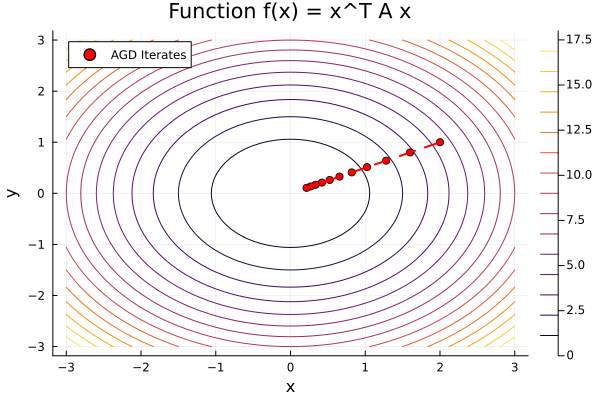

In [41]:
# Initial point
x0 = [2.0, 1.0]

# Number of iterations
num_iters = 10

# Run agd
iterates_f = agd(x0, ∇f, num_iters, α=.1, β=0)

# Create contour plots and overlay the iterates
contour(-3:0.1:3, -3:0.1:3, (x, y) -> f([x, y]), title="Function f(x) = x^T A x", xlabel="x", ylabel="y")
scatter!([x[1] for x in iterates_f], [x[2] for x in iterates_f], markershape=:circle, color=:red, label="AGD Iterates")
plot!([x[1] for x in iterates_f], [x[2] for x in iterates_f], color=:red, linewidth=2, linestyle=:dash, label="")

# Poorly conditioned function

In [16]:
# Poorly conditioned psd A
A = [10.0 3.0; 3.0 2.0]

# Function f(x) = x^T A x
f(x) = x' * A * x

# Gradient of f(x)
∇f(x) = 2 * A * x

∇f (generic function with 1 method)

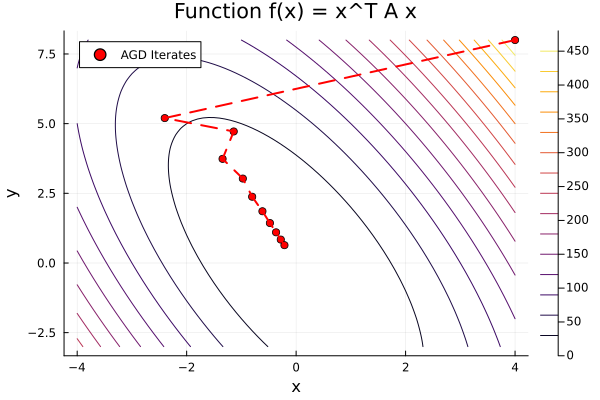

In [24]:
# Initial point
x0 = [4.0, 8.0]

# Number of iterations
num_iters = 10

# Fixed step size
step_size = .08

# Run agd
iterates_f = agd(x0, ∇f, num_iters, α=.05, β=.5)

# Create contour plots and overlay the iterates
contour(-4:0.1:4, -3:0.1:8, (x, y) -> f([x, y]), title="Function f(x) = x^T A x", xlabel="x", ylabel="y")
scatter!([x[1] for x in iterates_f], [x[2] for x in iterates_f], markershape=:circle, color=:red, label="AGD Iterates")
plot!([x[1] for x in iterates_f], [x[2] for x in iterates_f], color=:red, linewidth=2, linestyle=:dash, label="")

# Non-differentiable function

In [29]:
# Well conditioned psd A
A = [1.0 0.0; 0.0 1.0]

# Function g(x) = ||Ax||_1
g(x) = norm(A * x, 1)

# Gradient of g(x)
∇g(x) = A' * sign.(A * x)

∇g (generic function with 1 method)

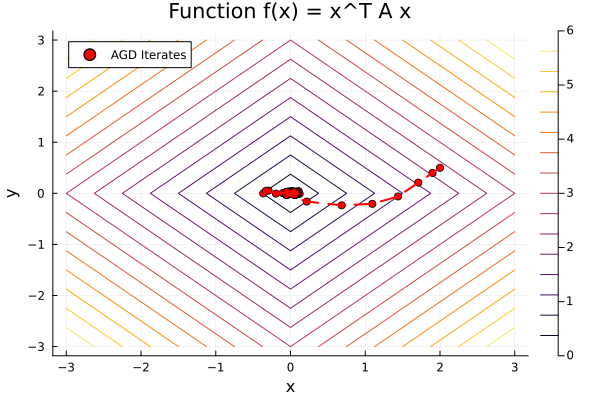

In [30]:
# Initial point
x0 = [2.0, 0.5]

# Number of iterations
num_iters = 100

# Fixed step size
step_size = .08

# Run gradient descent
iterates_g = agd(x0, ∇g, num_iters, α=.1, β=.9)

# Create contour plots and overlay the iterates
contour(-3:0.1:3, -3:0.1:3, (x, y) -> g([x, y]), title="Function f(x) = x^T A x", xlabel="x", ylabel="y")
scatter!([x[1] for x in iterates_g], [x[2] for x in iterates_g], markershape=:circle, color=:red, label="AGD Iterates")
plot!([x[1] for x in iterates_g], [x[2] for x in iterates_g], color=:red, linewidth=2, linestyle=:dash, label="")